# All Sites- Analysis 1 
## box plots figures in this notebook

In [1]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

# Import All Data

## Sodankyla Data

In [2]:
# OPEN MET DATA 
sod =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Sodankyla/SOD_1819_1hr_cleaned.csv")
sod['datetime'] = pd.to_datetime(sod['datetime'])

# OPEN CLASSIFICATIONS
sodobs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_sodankyla2019.csv")
sodobs['datetime'] = pd.to_datetime(sodobs['datetime'])
sodobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERGE
soddf = pd.merge(sod, sodobs, how='outer', on='datetime')
soddf.index = pd.DatetimeIndex(soddf['datetime'])
soddf.drop(columns=['datetime'], inplace=True)

# Create seperate df for only snow in the canopy timesteps 
sod_df_unload = soddf.copy(deep=True)
sod_df_unload = sod_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
sod_df_unload.dropna(inplace=True)

# Create sunlit column
sod_df_unload['Sunlit'] = sod_df_unload.E.copy(deep=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
sod_df_unload['Classification'] = sod_df_unload.CD.copy(deep=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 0, "Snow Unloading", inplace=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 1, "Snow Staying", inplace=True)

sod_df_snowstay   = sod_df_unload.where(sod_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
sod_df_snowunload = sod_df_unload.where(sod_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

## Laret

In [3]:
# Open met dataset
opn  = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/opnc_hcass.csv")
opn['datetime'] = pd.to_datetime(opn['datetime'])

# Open observations classifications 
obs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/Excel/Datetime/datetimeformat_ccg_classifications_only_cutdates.csv")
obs['datetime'] = pd.to_datetime(obs['datetime'])
obs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed

# Merge them
opndf = pd.merge(opn, obs, how='outer', on='datetime')
opndf.index = pd.DatetimeIndex(opndf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
opn_df_unload = opndf.copy(deep=True)
opn_df_unload = opn_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
opn_df_unload.dropna(inplace=True)

# SPECIAL FOR LARET BECAUSE OF NAMES 
opn_df_unload['temp'] = opn_df_unload['AirTC_Avg'].copy(deep=True)
opn_df_unload['shortwave'] = opn_df_unload['SWR_Avg'].copy(deep=True)
opn_df_unload['windspeed'] = opn_df_unload['WS_ms_Avg'].copy(deep=True)

# Create sunlit column
opn_df_unload['Sunlit'] = opn_df_unload.E.copy(deep=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
opn_df_unload['Classification'] = opn_df_unload.CD.copy(deep=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 0, "Snow Unloading", inplace=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 1, "Snow Staying", inplace=True)

opn_df_snowstay   = opn_df_unload.where(opn_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
opn_df_snowunload = opn_df_unload.where(opn_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

## Niwot

In [4]:
# AMERIFLUX MET DATA 
niwotflux =   pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/niwot_2017_ameriflux_unload1hr.csv")
niwotflux['datetime']  = pd.DatetimeIndex(niwotflux['datetime'])

# OBSERVATIONS CLASSIFICATIONS
niwotobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_niwot2017.csv")
niwotobs['datetime'] = pd.to_datetime(niwotobs['datetime'])

niwotobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERG THEM 
niwotdf = pd.merge(niwotflux, niwotobs, how='outer', on='datetime')
niwotdf.index = pd.DatetimeIndex(niwotdf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
niwot_df_unload = niwotdf.copy(deep=True)
niwot_df_unload = niwot_df_unload.dropna(axis=0, subset=['CD'])

# # Have to remove all nans for this plotting to work.... need to come back to this 
# niwot_df_unload.dropna(inplace=True)

# Create sunlit column
niwot_df_unload['Sunlit'] = niwot_df_unload.E.copy(deep=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
niwot_df_unload['Classification'] = niwot_df_unload.CD.copy(deep=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 0, "Snow Unloading", inplace=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 1, "Snow Staying", inplace=True)

niwot_df_snowstay   = niwot_df_unload.where(niwot_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
niwot_df_snowunload = niwot_df_unload.where(niwot_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

## Hopper

In [5]:
# OPEN MET DATA 
hopper = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/mounthopper_wrf.csv")
hopper['datetime'] = pd.to_datetime(hopper['datetime'])

# OPEN CLASSIFICATIONS
hopperobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_mnthopperWY2016.csv")
hopperobs['datetime'] = pd.to_datetime(hopperobs['datetime'])                     

# MERGE
hopperdf = pd.merge(hopper, hopperobs, how='outer', on='datetime')
hopperdf.index = pd.DatetimeIndex(hopperdf['datetime'])
hopperdf.drop(columns=['datetime'], inplace=True)

hopperdf = hopperdf.loc['2015-10-15T00:00:00':'2016-05-15T00:00:00'] 

# Create seperate df for only snow in the canopy timesteps 
hop_df_unload = hopperdf.copy(deep=True)
hop_df_unload = hop_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
hop_df_unload.dropna(inplace=True)

# Create sunlit column
hop_df_unload['Sunlit'] = hop_df_unload.E.copy(deep=True)
hop_df_unload.Sunlit.mask(hop_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
hop_df_unload.Sunlit.mask(hop_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
hop_df_unload['Classification'] = hop_df_unload.CD.copy(deep=True)
hop_df_unload.Classification.mask(hop_df_unload.Classification == 0, "Snow Unloading", inplace=True)
hop_df_unload.Classification.mask(hop_df_unload.Classification == 1, "Snow Staying", inplace=True)

hop_df_snowstay   = hop_df_unload.where(hop_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
hop_df_snowunload = hop_df_unload.where(hop_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

# Plot

In [6]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 
unloadcolors = [colorsnow, colorsnowunload]

# Names
namesnow = 'Snow Staying'
namesnowunload = 'Snow Unloading'
group_labels = ['Snow Staying', 'Snow Unloading']

nametemp = "Air Temperature (C)"
namewind = "Wind Speed (m/s)"
nameSW = "Shortwave (W/m2)"

# namelaret = 'Davos Laret, Switzerland'
# nameniwot = 'Niwot Ridge, Colorado, USA'
# namehopper = 'Mount Hopper, Washington, USA'
# namesodankyla = 'Sodankyla, Finland'

namesodankyla = 'A)  Sodankyla, Finland'
namesod = 'A)  Sodankyla, Finland'
namelaret = 'B)  Davos Laret, Switzerland'
nameniwot = 'C)  Niwot Ridge, Colorado, USA'

# colors and names 
color1='tomato'; color2='maroon'; color3='navy'
colors = [color1, color2, color3]

# name1 = '600 < SW'; name2 = '400 < SW < 600'; name3 = '400 > SW'
name1 = 'SW > 600'; name2 = '400 < SW < 600'; name3 = 'SW < 400'
label = [name1, name2, name3]

In [7]:
# Hopper: hop_df_unload
# hop_df_snowstay
# hop_df_snowunload

# Laret: opn_df_unload
# opn_df_snowstay
# opn_df_snowunload

# Sodankyla: sod_df_unload
# sod_df_snowstay
# sod_df_snowunload

# Niwot: niwot_df_unload
# niwot_df_snowstay
# niwot_df_snowunload

In [8]:
marker=2
fig = go.Figure()

# Laret  
trace1 = go.Box(y=opn_df_snowstay.temp,           name=namesnow,       marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace2 = go.Box(y=opn_df_snowunload.temp,         name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=opn_df_snowstay.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace4 = go.Box(y=opn_df_snowunload.shortwave,    name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace5 = go.Box(y=opn_df_snowstay.windspeed,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace6 = go.Box(y=opn_df_snowunload.windspeed,    name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Sodankyla
trace7 = go.Box(y=sod_df_snowstay.temp,           name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace8 = go.Box(y=sod_df_snowunload.temp,         name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace9 = go.Box(y=sod_df_snowstay.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace10 = go.Box(y=sod_df_snowunload.shortwave,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace11 = go.Box(y=sod_df_snowstay.windspeed,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace12 = go.Box(y=sod_df_snowunload.windspeed,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Niwot
trace13 = go.Box(y=niwot_df_snowstay.temp,        name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace14 = go.Box(y=niwot_df_snowunload.temp,      name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace15 = go.Box(y=niwot_df_snowstay.shortwave,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace16 = go.Box(y=niwot_df_snowunload.shortwave, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace17 = go.Box(y=niwot_df_snowstay.windspeed,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace18 = go.Box(y=niwot_df_snowunload.windspeed, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# # Mount Hopper 
# trace19 = go.Box(y=hop_df_snowstay.temp,          name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
# trace20 = go.Box(y=hop_df_snowunload.temp,        name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# trace21 = go.Box(y=hop_df_snowstay.shortwave,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
# trace22 = go.Box(y=hop_df_snowunload.shortwave,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# trace23 = go.Box(y=hop_df_snowstay.windspeed,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
# trace24 = go.Box(y=hop_df_snowunload.windspeed,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')


fig = make_subplots(rows=3, cols=3, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=(namelaret, namesodankyla, nameniwot))

# Laret
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 1, col = 1)
fig.append_trace(trace3,  row = 2, col = 1)
fig.append_trace(trace4,  row = 2, col = 1)
fig.append_trace(trace5,  row = 3, col = 1)
fig.append_trace(trace6,  row = 3, col = 1)

# Sodankyla 
fig.append_trace(trace7,  row = 1, col = 2)
fig.append_trace(trace8,  row = 1, col = 2)
fig.append_trace(trace9,  row = 2, col = 2)
fig.append_trace(trace10, row = 2, col = 2)
fig.append_trace(trace11, row = 3, col = 2)
fig.append_trace(trace12, row = 3, col = 2)

# Niwot 
fig.append_trace(trace13, row = 1, col = 3)
fig.append_trace(trace14, row = 1, col = 3)
fig.append_trace(trace15, row = 2, col = 3)
fig.append_trace(trace16, row = 2, col = 3)
fig.append_trace(trace17, row = 3, col = 3)
fig.append_trace(trace18, row = 3, col = 3)

# # Mount Hopper 
# fig.append_trace(trace19, row = 1, col = 4)
# fig.append_trace(trace20, row = 1, col = 4)
# fig.append_trace(trace21, row = 2, col = 4)
# fig.append_trace(trace22, row = 2, col = 4)
# fig.append_trace(trace23, row = 3, col = 4)
# fig.append_trace(trace24, row = 3, col = 4)

fig.update_layout(title='DIFFERENT ORDER FOR THIS ONE', width=1200, height=1000) 

fig.update_yaxes(title_text=nametemp, row=1, col=1)
fig.update_yaxes(title_text=nameSW,   row=2, col=1)
fig.update_yaxes(title_text=namewind, row=3, col=1)


fig.show()

In [22]:
marker=2
fig = go.Figure()

# Laret  
trace1 = go.Box(y=opn_df_snowstay.temp,           name=namesnow,       marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace2 = go.Box(y=opn_df_snowunload.temp,         name=namesnowunload, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace3 = go.Box(y=opn_df_snowstay.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace4 = go.Box(y=opn_df_snowunload.shortwave,    name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace5 = go.Box(y=opn_df_snowstay.windspeed,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace6 = go.Box(y=opn_df_snowunload.windspeed,    name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Sodankyla
trace7 = go.Box(y=sod_df_snowstay.temp,           name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace8 = go.Box(y=sod_df_snowunload.temp,         name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace9 = go.Box(y=sod_df_snowstay.shortwave,      name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace10 = go.Box(y=sod_df_snowunload.shortwave,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace11 = go.Box(y=sod_df_snowstay.windspeed,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace12 = go.Box(y=sod_df_snowunload.windspeed,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# Niwot
trace13 = go.Box(y=niwot_df_snowstay.temp,        name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
trace14 = go.Box(y=niwot_df_snowunload.temp,      name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace15 = go.Box(y=niwot_df_snowstay.shortwave,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace16 = go.Box(y=niwot_df_snowunload.shortwave, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

trace17 = go.Box(y=niwot_df_snowstay.windspeed,   name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
trace18 = go.Box(y=niwot_df_snowunload.windspeed, name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# # Mount Hopper 
# trace19 = go.Box(y=hop_df_snowstay.temp,          name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker,boxpoints='all')
# trace20 = go.Box(y=hop_df_snowunload.temp,        name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# trace21 = go.Box(y=hop_df_snowstay.shortwave,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
# trace22 = go.Box(y=hop_df_snowunload.shortwave,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')

# trace23 = go.Box(y=hop_df_snowstay.windspeed,     name=namesnow,       showlegend=False, marker_color=colorsnow,       marker_size=marker, boxpoints='all')
# trace24 = go.Box(y=hop_df_snowunload.windspeed,   name=namesnowunload, showlegend=False, marker_color=colorsnowunload, marker_size=marker, boxpoints='all')


fig = make_subplots(rows=3, cols=3, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=(namesodankyla, namelaret, nameniwot))


# Moving Sodankyla as the first site in the columns for this version, incase I want that 
# Sodankyla 
fig.append_trace(trace7,  row = 1, col = 1)
fig.append_trace(trace8,  row = 1, col = 1)
fig.append_trace(trace9,  row = 2, col = 1)
fig.append_trace(trace10, row = 2, col = 1)
fig.append_trace(trace11, row = 3, col = 1)
fig.append_trace(trace12, row = 3, col = 1)

# Laret
fig.append_trace(trace1,  row = 1, col = 2)
fig.append_trace(trace2,  row = 1, col = 2)
fig.append_trace(trace3,  row = 2, col = 2)
fig.append_trace(trace4,  row = 2, col = 2)
fig.append_trace(trace5,  row = 3, col = 2)
fig.append_trace(trace6,  row = 3, col = 2)

# Niwot 
fig.append_trace(trace13, row = 1, col = 3)
fig.append_trace(trace14, row = 1, col = 3)
fig.append_trace(trace15, row = 2, col = 3)
fig.append_trace(trace16, row = 2, col = 3)
fig.append_trace(trace17, row = 3, col = 3)
fig.append_trace(trace18, row = 3, col = 3)

# # Mount Hopper 
# fig.append_trace(trace19, row = 1, col = 4)
# fig.append_trace(trace20, row = 1, col = 4)
# fig.append_trace(trace21, row = 2, col = 4)
# fig.append_trace(trace22, row = 2, col = 4)
# fig.append_trace(trace23, row = 3, col = 4)
# fig.append_trace(trace24, row = 3, col = 4)

fig.update_layout(title='', width=1200, height=1000) 

fig.update_yaxes(title_text=nametemp, row=1, col=1)
fig.update_yaxes(title_text=nameSW,   row=2, col=1)
fig.update_yaxes(title_text=namewind, row=3, col=1)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.04,
    xanchor="right",
    x=.627
))


fig.show()

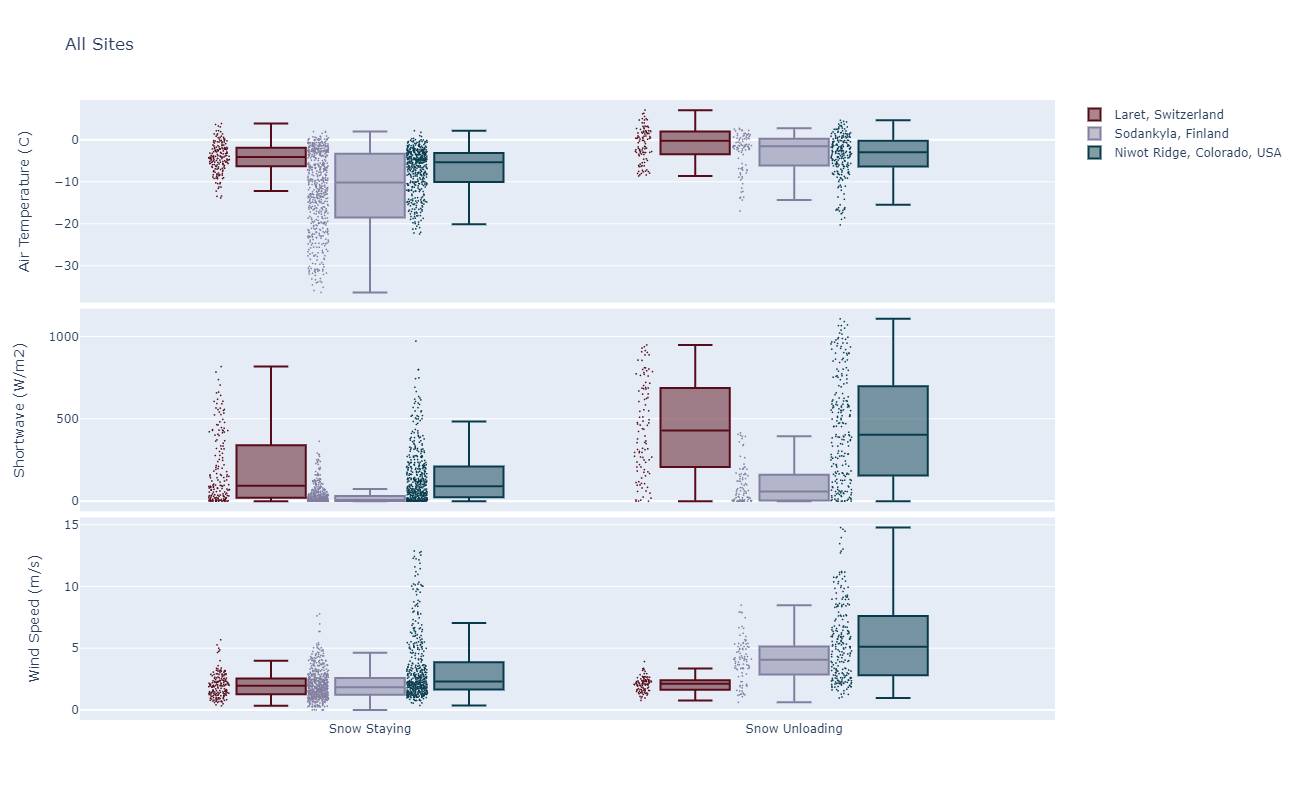

In [9]:
fig = go.Figure()

marker=1.5
# colorlaret='darkred'
# colorsodankyla='darkcyan'
# colorniwot='darkblue'
# colorhopper='darkolivegreen'

colorlaret='#550C18'
# colorsodankyla='#66E1D0'
colorsodankyla='#817E9F'
colorniwot='#073B4C'
colorhopper='#AF9164'

# Laret  
trace1 = go.Box(y=opn_df_unload.temp,       x=opn_df_unload.Classification, name=namelaret,   marker_color=colorlaret,  marker_size=marker, boxpoints='all', offsetgroup=0)
trace2 = go.Box(y=opn_df_unload.shortwave,  x=opn_df_unload.Classification, showlegend=False, marker_color=colorlaret,  marker_size=marker, boxpoints='all', offsetgroup=0)
trace3 = go.Box(y=opn_df_unload.windspeed,  x=opn_df_unload.Classification, showlegend=False, marker_color=colorlaret,  marker_size=marker, boxpoints='all', offsetgroup=0)

# Sodankyla
trace4 = go.Box(y=sod_df_unload.temp,       x=sod_df_unload.Classification, name=namesodankyla,  marker_color=colorsodankyla,  marker_size=marker, boxpoints='all', offsetgroup=1)
trace5 = go.Box(y=sod_df_unload.shortwave,  x=sod_df_unload.Classification, showlegend=False,    marker_color=colorsodankyla,  marker_size=marker, boxpoints='all', offsetgroup=1)
trace6 = go.Box(y=sod_df_unload.windspeed,  x=sod_df_unload.Classification, showlegend=False,    marker_color=colorsodankyla,  marker_size=marker, boxpoints='all', offsetgroup=1)

# Niwot
trace7 = go.Box(y=niwot_df_unload.temp,       x=niwot_df_unload.Classification, name=nameniwot,   marker_color=colorniwot,  marker_size=marker, boxpoints='all', offsetgroup=2)
trace8 = go.Box(y=niwot_df_unload.shortwave,  x=niwot_df_unload.Classification, showlegend=False, marker_color=colorniwot,  marker_size=marker, boxpoints='all', offsetgroup=2)
trace9 = go.Box(y=niwot_df_unload.windspeed,  x=niwot_df_unload.Classification, showlegend=False, marker_color=colorniwot,  marker_size=marker, boxpoints='all', offsetgroup=2)

# # Mount Hopper 
# trace10 = go.Box(y=hop_df_unload.temp,       x=hop_df_unload.Classification, name=namehopper,  marker_color=colorhopper,  marker_size=marker, boxpoints='all', offsetgroup=3)
# trace11 = go.Box(y=hop_df_unload.shortwave,  x=hop_df_unload.Classification, showlegend=False, marker_color=colorhopper,  marker_size=marker, boxpoints='all', offsetgroup=3)
# trace12 = go.Box(y=hop_df_unload.windspeed,  x=hop_df_unload.Classification, showlegend=False, marker_color=colorhopper,  marker_size=marker, boxpoints='all', offsetgroup=3)


fig = make_subplots(rows=3, cols=1, vertical_spacing=0.01, horizontal_spacing=0.01, shared_xaxes=True, shared_yaxes=True,
                                        subplot_titles=())

# Laret
fig.append_trace(trace1,  row = 1, col = 1)
fig.append_trace(trace2,  row = 2, col = 1)
fig.append_trace(trace3,  row = 3, col = 1)

# Sodankyla 
fig.append_trace(trace4,  row = 1, col = 1)
fig.append_trace(trace5,  row = 2, col = 1)
fig.append_trace(trace6,  row = 3, col = 1)

# Niwot 
fig.append_trace(trace7,  row = 1, col = 1)
fig.append_trace(trace8,  row = 2, col = 1)
fig.append_trace(trace9,  row = 3, col = 1)

# # Mount Hopper
# fig.append_trace(trace10,  row = 1, col = 1)
# fig.append_trace(trace11,  row = 2, col = 1)
# fig.append_trace(trace12,  row = 3, col = 1)


fig.update_layout(title='All Sites', width=1200, height=800, boxmode='group') 

fig.update_yaxes(title_text=nametemp, row=1, col=1)
fig.update_yaxes(title_text=nameSW,   row=2, col=1)
fig.update_yaxes(title_text=namewind, row=3, col=1)
fig.update_xaxes(categoryorder='array', categoryarray= ['Snow Staying', 'Snow Unloading'])



fig.show()